In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
mcd = pd.read_csv("/content/mcdonalds.csv")

In [3]:
print(mcd.columns.tolist())
print('\n')
print(mcd.shape)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


(1453, 15)


In [4]:
mcd.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [ ]:
#pandas' vectorized operation for Y/N --> T/F , then T/F--> OHE -->np array
MD_x = (mcd.iloc[:, :11] == "Yes").astype(int).to_numpy()

column_means = MD_x.mean(axis=0).round(2)     #axis = 0 =>column mean rounded to 2 decimal places

column_names = mcd.columns[:11].tolist()
for i, col_name in enumerate(column_names):
  print(f"{col_name} -> {column_means[i]}")

yummy -> 0.55
convenient -> 0.91
spicy -> 0.09
fattening -> 0.87
greasy -> 0.53
fast -> 0.9
cheap -> 0.6
tasty -> 0.64
expensive -> 0.36
healthy -> 0.2
disgusting -> 0.24


In [ ]:
#Performing PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Display PCA summary
explained_variance = pca.explained_variance_ratio_

for i, col_name in enumerate(column_names):
  print(f"{col_name} -> {explained_variance[i]}")



yummy -> 0.299447231878926
convenient -> 0.19279721373248387
spicy -> 0.133045351854204
fattening -> 0.08309577812565545
greasy -> 0.05948052272658787
fast -> 0.0502995613799291
cheap -> 0.04384909972678373
tasty -> 0.03954779117292009
expensive -> 0.03676089728915918
healthy -> 0.032353290720464827
disgusting -> 0.02932326139288608


In [ ]:
#Print component loadings
for i, col_name in enumerate(column_names):
    print(f"{col_name}:", end=" ")
    for j in range(11):
        print(f"PC{j+1}:{pca.components_[j, i]:.3f}", end="  ")
    print('\n')

yummy: PC1:0.477  PC2:-0.364  PC3:0.304  PC4:0.055  PC5:0.308  PC6:-0.171  PC7:-0.281  PC8:-0.013  PC9:-0.572  PC10:0.110  PC11:-0.045  

convenient: PC1:0.155  PC2:-0.016  PC3:0.063  PC4:-0.142  PC5:-0.278  PC6:0.348  PC7:-0.060  PC8:0.113  PC9:0.018  PC10:0.666  PC11:0.542  

spicy: PC1:0.006  PC2:-0.019  PC3:0.037  PC4:0.198  PC5:-0.071  PC6:0.355  PC7:0.708  PC8:-0.376  PC9:-0.400  PC10:0.076  PC11:-0.142  

fattening: PC1:-0.116  PC2:0.034  PC3:0.322  PC4:-0.354  PC5:0.073  PC6:0.407  PC7:-0.386  PC8:-0.590  PC9:0.161  PC10:0.005  PC11:-0.251  

greasy: PC1:-0.304  PC2:0.064  PC3:0.802  PC4:0.254  PC5:-0.361  PC6:-0.209  PC7:0.036  PC8:0.138  PC9:0.003  PC10:-0.009  PC11:-0.002  

fast: PC1:0.108  PC2:0.087  PC3:0.065  PC4:-0.097  PC5:-0.108  PC6:0.595  PC7:-0.087  PC8:0.628  PC9:-0.166  PC10:-0.240  PC11:-0.339  

cheap: PC1:0.337  PC2:0.611  PC3:0.149  PC4:0.119  PC5:0.129  PC6:0.103  PC7:-0.040  PC8:-0.140  PC9:-0.076  PC10:-0.428  PC11:0.489  

tasty: PC1:0.472  PC2:-0.307  PC

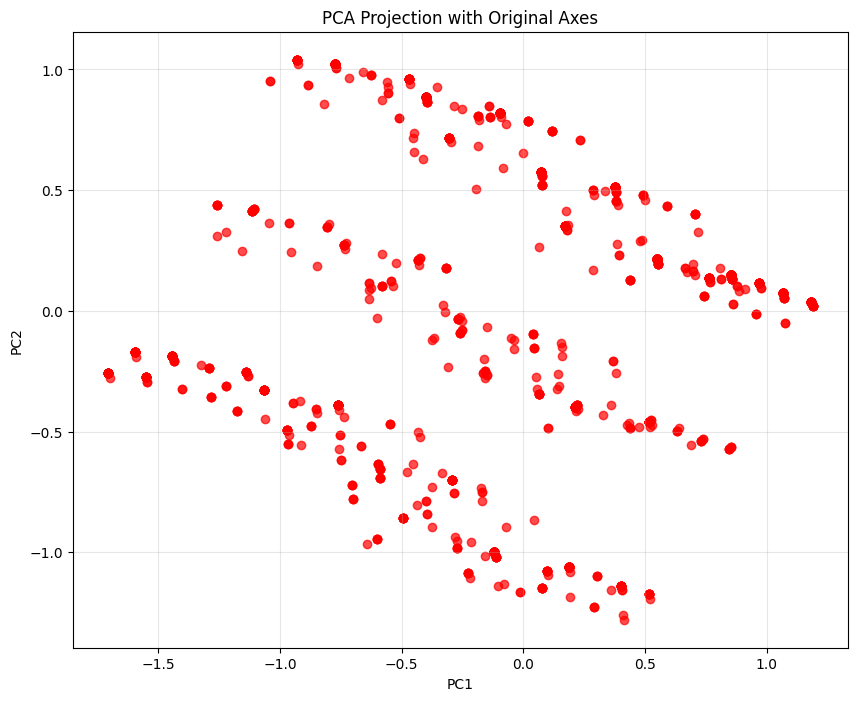

In [ ]:
# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='red', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Original Axes')
plt.grid(alpha=0.3)

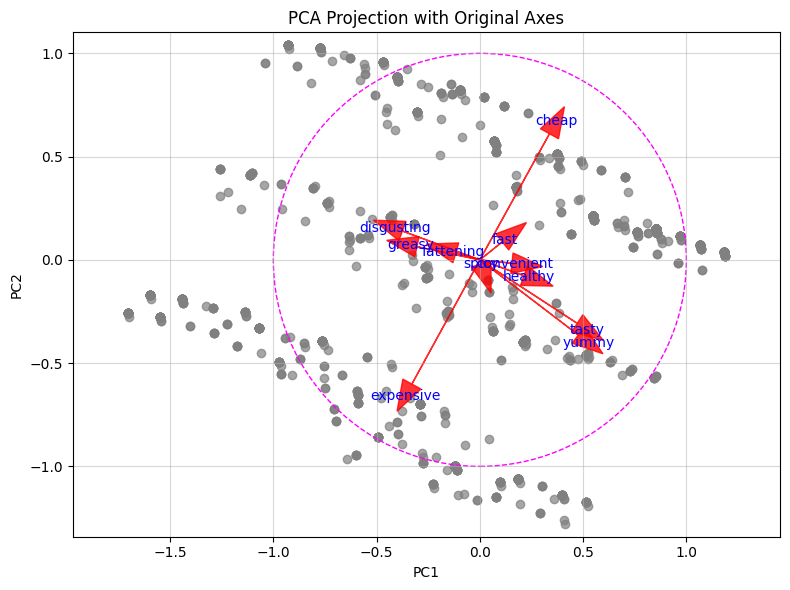

In [ ]:
# Plotting the first two principal components

# Axes
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Original Axes')
plt.grid(alpha=0.5)

scaling_factor = 1

for i, col_name in enumerate(column_names):
    # Getting loadings for this feature for PC1 and PC2
    loading_pc1 = pca.components_[0, i]
    loading_pc2 = pca.components_[1, i]

    # Draw the axis line
    plt.arrow(0, 0,
              scaling_factor * loading_pc1,
              scaling_factor * loading_pc2,
              color='red', alpha=0.8, head_width=0.1)

    # Add feature name at the end of the arrow
    plt.text(scaling_factor * loading_pc1 * 1.1,
             scaling_factor * loading_pc2 * 1.1,
             col_name, color='blue', ha='center', va='center')

# Add a circle for scale
circle = plt.Circle((0, 0), 1, fill=False, color='magenta', linestyle='--')
plt.gca().add_patch(circle)

plt.axis('equal')  # Equal scaling for both axes
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(1234)

# Range of cluster numbers to try
cluster_range = range(2, 9)  # 2 to 8 clusters
n_reps = 10  # Number of repetitions

Processing 2 clusters...
Processing 3 clusters...
Processing 4 clusters...
Processing 5 clusters...
Processing 6 clusters...
Processing 7 clusters...
Processing 8 clusters...


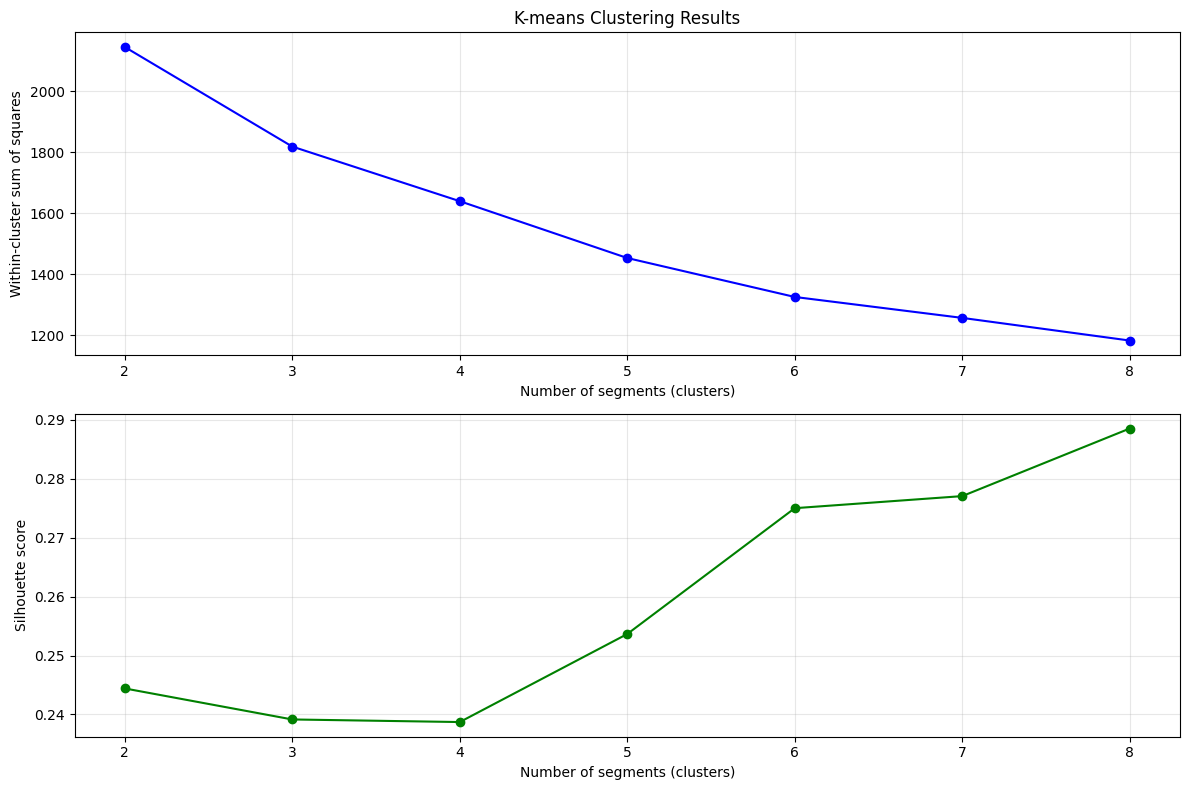

In [ ]:


# Dictionary to store results
best_models = {}
inertia_values = []
silhouette_values = []

# Run KMeans for each cluster count with multiple repetitions
for k in cluster_range:
    best_inertia = float('inf')
    best_model = None

    print(f"Processing {k} clusters...")

    # Run multiple times with different initializations
    for _ in range(n_reps):
        kmeans = KMeans(n_clusters=k, random_state=np.random.randint(0, 10000), n_init=1)
        kmeans.fit(MD_x)

        # Keep the model with the lowest inertia (sum of squared distances)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_model = kmeans

    # Store the best model for this k
    best_models[k] = best_model
    inertia_values.append(best_inertia)

    # Calculate silhouette score for this clustering
    silhouette_avg = silhouette_score(MD_x, best_model.labels_)
    silhouette_values.append(silhouette_avg)

# Create plot (similar to plot(MD.km28))
plt.figure(figsize=(12, 8))

# Plot 1: Inertia (Within-cluster sum of squares)
plt.subplot(2, 1, 1)
plt.plot(cluster_range, inertia_values, 'o-', color='blue')
plt.title('K-means Clustering Results')
plt.xlabel('Number of segments (clusters)')
plt.ylabel('Within-cluster sum of squares')
plt.grid(True, alpha=0.3)

# Plot 2: Silhouette score
plt.subplot(2, 1, 2)
plt.plot(cluster_range, silhouette_values, 'o-', color='green')
plt.xlabel('Number of segments (clusters)')
plt.ylabel('Silhouette score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Processing 2 clusters...
Processing 3 clusters...
Processing 4 clusters...
Processing 5 clusters...
Processing 6 clusters...
Processing 7 clusters...
Processing 8 clusters...


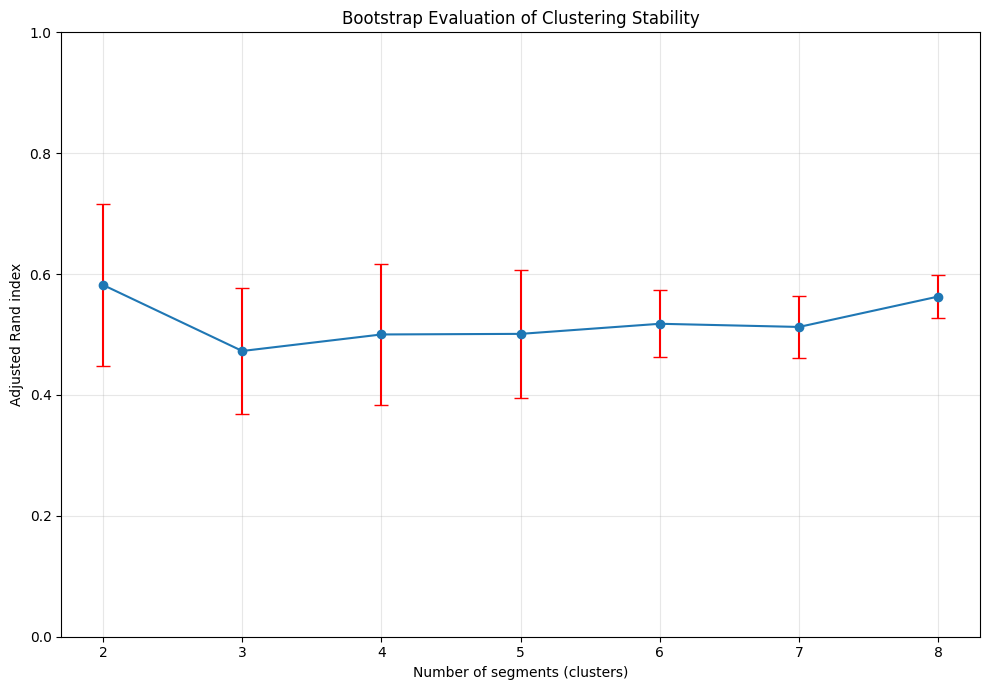

In [ ]:
n_boot = 100    # Number of bootstrap samples

# Dictionary to store results
rand_indices = {k: [] for k in cluster_range}

# For each number of clusters
for k in cluster_range:
    print(f"Processing {k} clusters...")

    # Repeat the process n_reps times
    for rep in range(n_reps):
        # Initialize list to store ARI values for this k and rep
        rep_rand_indices = []

        # Fit a base model on the original data
        base_kmeans = KMeans(n_clusters=k, random_state=rep)
        base_kmeans.fit(MD_x)
        base_labels = base_kmeans.labels_

        # Generate bootstrap samples and compute ARI
        for _ in range(n_boot):
            # Create bootstrap sample
            indices = np.random.choice(MD_x.shape[0], size=MD_x.shape[0], replace=True)
            X_boot = MD_x[indices]

            # Fit model on bootstrap sample
            boot_kmeans = KMeans(n_clusters=k, random_state=rep)
            boot_kmeans.fit(X_boot)

            # Get predictions for original data points
            boot_labels = boot_kmeans.predict(MD_x)

            # Calculate adjusted Rand index
            ari = adjusted_rand_score(base_labels, boot_labels)
            rep_rand_indices.append(ari)

        # Store average ARI for this repetition
        rand_indices[k].append(np.mean(rep_rand_indices))

# Average ARI across repetitions for each k
avg_rand_indices = [np.mean(rand_indices[k]) for k in cluster_range]
# Std dev of ARI across repetitions for each k
std_rand_indices = [np.std(rand_indices[k]) for k in cluster_range]

# Create plot similar to plot(MD.b28)
plt.figure(figsize=(10, 7))
plt.errorbar(cluster_range, avg_rand_indices, yerr=std_rand_indices,
             fmt='o-', ecolor='red', capsize=5)
plt.xlabel('Number of segments (clusters)')
plt.ylabel('Adjusted Rand index')
plt.title('Bootstrap Evaluation of Clustering Stability')
plt.grid(True, alpha=0.3)
plt.xticks(cluster_range)
plt.ylim(0, 1)  # ARI ranges from -1 to 1, but typically 0 to 1 for similar clusterings
plt.tight_layout()
plt.show()

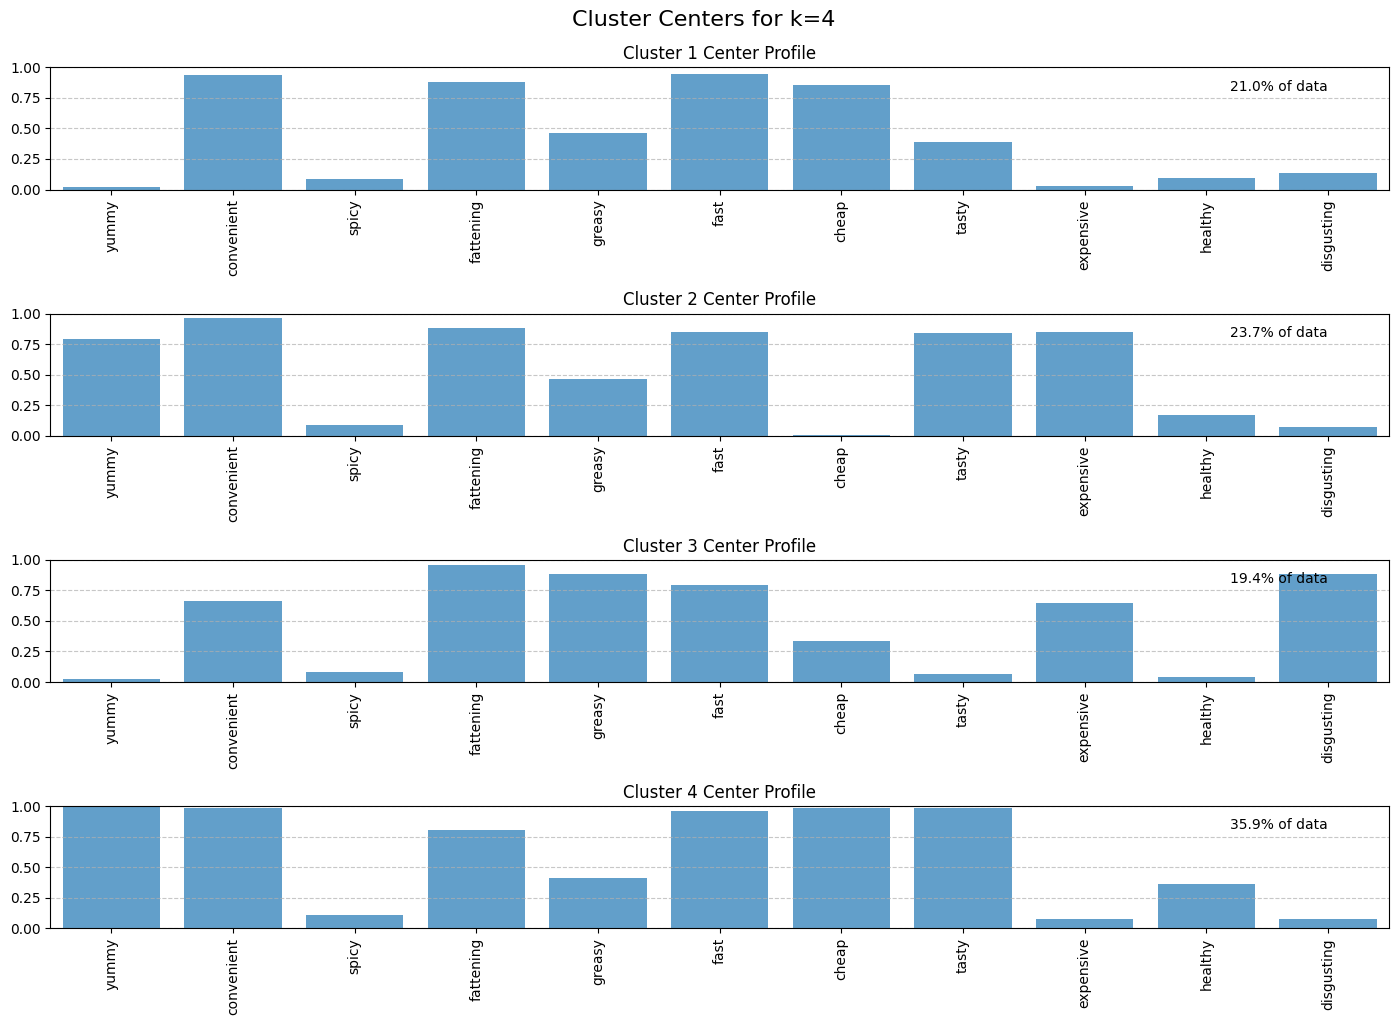

In [ ]:
kmeans_4 = best_models[4]

# Get cluster centers
centers = kmeans_4.cluster_centers_

# Number of clusters and features
n_clusters = centers.shape[0]
n_features = centers.shape[1]

# Histogram for each cluster
plt.figure(figsize=(14, 10))

for i in range(n_clusters):
    plt.subplot(n_clusters, 1, i+1)

    # Centers as bar chart
    plt.bar(range(n_features), centers[i], alpha=0.7)
    plt.xlim(-0.5, n_features-0.5)
    plt.ylim(0, 1) #-----------------> Set y-limits from 0 to 1 as in the R code

    # Add feature names as x-tick labels
    plt.xticks(range(n_features), column_names, rotation=90)

    # Add a title for each cluster
    plt.title(f'Cluster {i+1} Center Profile')

    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage of data points in this cluster
    cluster_size = np.sum(kmeans_4.labels_ == i)
    percentage = cluster_size / len(kmeans_4.labels_) * 100
    plt.text(n_features-1, 0.9, f'{percentage:.1f}% of data',
             horizontalalignment='right', verticalalignment='top')

plt.tight_layout()
plt.suptitle('Cluster Centers for k=4', y=1.02, fontsize=16)
plt.show()


Calculating segment stability...


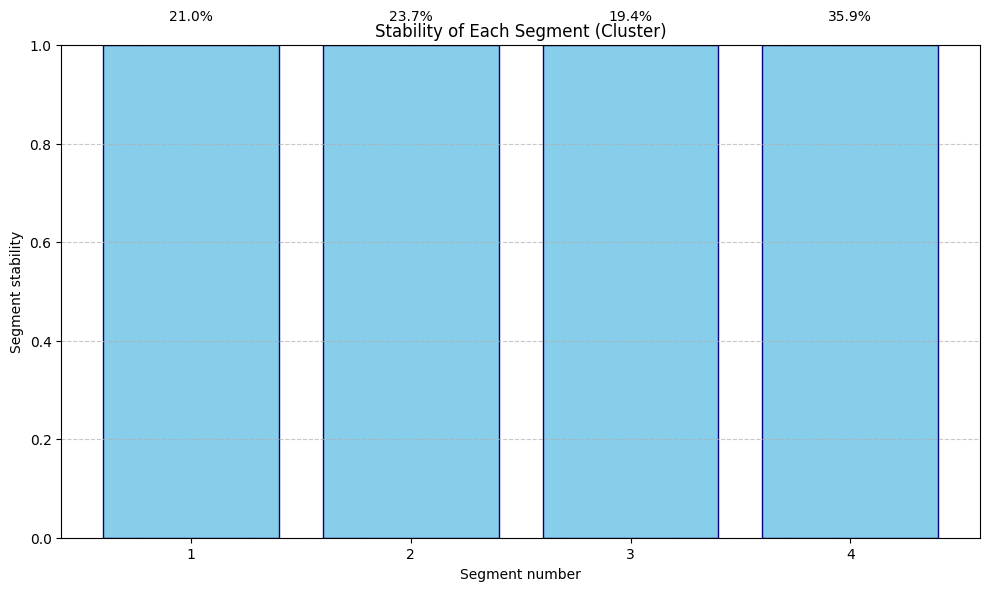

Segment 1 stability: 1.000
Segment 2 stability: 1.000
Segment 3 stability: 1.000
Segment 4 stability: 1.000


In [ ]:
kmeans_4 = best_models[4]
cluster_labels = kmeans_4.labels_
centers = kmeans_4.cluster_centers_
k = 4  # Number of clusters

# Function to implement segmentation large scale weighted bootstrap method
def slsw_bootstrap(X, labels, centers, n_boot=100):
    n_samples = X.shape[0]
    n_clusters = centers.shape[0]

    # Store stability scores for each cluster
    stability_scores = np.zeros(n_clusters)

    # For each bootstrap
    for _ in range(n_boot):
        # Create bootstrap sample
        boot_indices = np.random.choice(n_samples, size=n_samples, replace=True)
        X_boot = X[boot_indices]
        labels_boot = labels[boot_indices]

        # For each cluster
        for i in range(n_clusters):
            # Get points assigned to this cluster in the bootstrap sample
            cluster_points = X_boot[labels_boot == i]

            if len(cluster_points) > 0:
                # Calculate mean of these points
                boot_center = np.mean(cluster_points, axis=0)

                # Find the closest original cluster center
                distances = np.linalg.norm(centers - boot_center, axis=1)
                closest_center = np.argmin(distances)

                # If the closest center is the original center, increment stability
                if closest_center == i:
                    stability_scores[i] += 1

    # Normalize to get stability probability
    stability_scores /= n_boot
    return stability_scores

# Calculate stability for each segment/cluster
print("Calculating segment stability...")
stability_scores = slsw_bootstrap(MD_x, cluster_labels, centers)

# Plot the segment stability
plt.figure(figsize=(10, 6))
plt.bar(range(1, k+1), stability_scores, color='skyblue', edgecolor='navy')
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.title('Stability of Each Segment (Cluster)')
plt.ylim(0, 1)
plt.xticks(range(1, k+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add cluster sizes as text
for i in range(k):
    cluster_size = np.sum(cluster_labels == i)
    percentage = cluster_size / len(cluster_labels) * 100
    plt.text(i+1, stability_scores[i] + 0.05, f'{percentage:.1f}%',
             horizontalalignment='center')

plt.tight_layout()
plt.show()

# Print the stability scores
for i in range(k):
    print(f"Segment {i+1} stability: {stability_scores[i]:.3f}")

Processing 2 clusters...
Processing 3 clusters...
Processing 4 clusters...
Processing 5 clusters...
Processing 6 clusters...
Processing 7 clusters...
Processing 8 clusters...

Call:
GaussianMixture modeling of binary data (equivalent to stepFlexmix with FLXMCmvbinary)

      iter converged k logLik      AIC      BIC      ICL
 2      7     True  2  11147.821 -21985.64 -21167.03 -21167.03
 3      8     True  3  17572.568 -34679.14 -33448.57 -33448.57
 4     16     True  4  16633.944 -32645.89 -31003.38 -31001.82
 5      6     True  5  20966.893 -41155.79 -39101.33 -39101.23
 6     14     True  6  23883.762 -46833.52 -44367.12 -44362.88
 7     16     True  7  25759.042 -50428.08 -47549.73 -47545.51
 8     10     True  8  32127.613 -63009.23 -59718.92 -59718.92


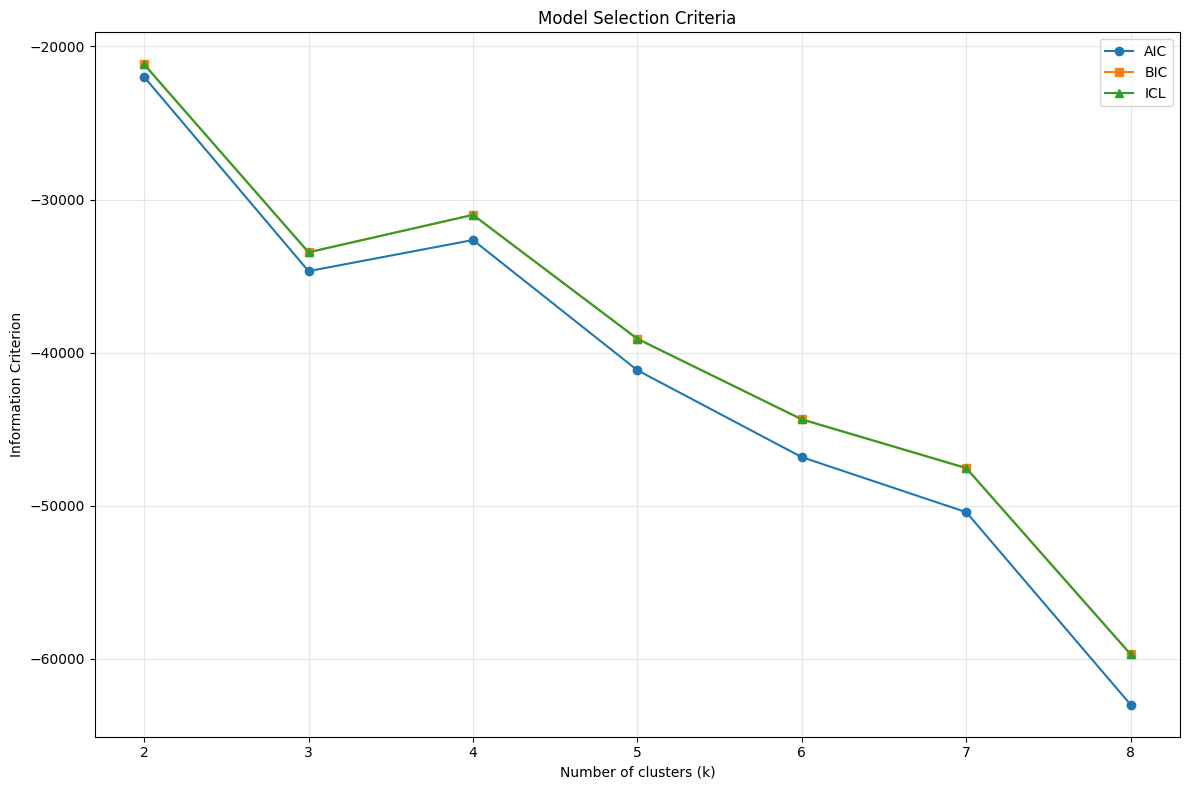

In [ ]:
np.random.seed(1234)

cluster_range = range(2, 9)  # 2 to 8 clusters to try
n_reps = 10  # Number of repetitions

# Dictionary to store results
best_models = {}
results = {
    'k': [],
    'iter': [],
    'converged': [],
    'logLik': [],
    'AIC': [],
    'BIC': [],
    'ICL': []
}

# Run mixture models for each cluster count with multiple repetitions
for k in cluster_range:
    print(f"Processing {k} clusters...")

    best_loglik = -np.inf
    best_model = None
    best_n_iter = 0

    # Run multiple times with different initializations
    for rep in range(n_reps):
        # Initialize Gaussian Mixture Model
        gmm = GaussianMixture(
            n_components=k,
            random_state=rep,
            max_iter=200,
            tol=1e-6,
            verbose=0,
            covariance_type='full'  # For binary data, this gives more flexibility
        )

        gmm.fit(MD_x)

        # log-likelihood
        loglik = gmm.score(MD_x) * MD_x.shape[0]

        # Keep the model with the highest log-likelihood
        if loglik > best_loglik:
            best_loglik = loglik
            best_model = gmm
            best_n_iter = gmm.n_iter_

    # Store the best model
    best_models[k] = best_model

    # Information criteria
    # Each component has p means, p(p+1)/2 covariance parameters plus k-1 mixing proportions
    p = MD_x.shape[1]
    n_params = k * (p + p*(p+1)/2) + (k-1)
    n_samples = MD_x.shape[0]

    aic = -2 * best_loglik + 2 * n_params
    bic = -2 * best_loglik + n_params * np.log(n_samples)

    # Calculate ICL (BIC + entropy penalty)
    probs = best_model.predict_proba(MD_x)
    entropy = -np.sum(probs * np.log(np.maximum(probs, 1e-10)))
    icl = bic + 2 * entropy

    # Store results
    results['k'].append(k)
    results['iter'].append(best_n_iter)
    results['converged'].append(best_model.converged_)
    results['logLik'].append(best_loglik)
    results['AIC'].append(aic)
    results['BIC'].append(bic)
    results['ICL'].append(icl)

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Print results similar to R output
print("\nCall:")
print("GaussianMixture modeling of binary data (equivalent to stepFlexmix with FLXMCmvbinary)")
print("\n      iter converged k logLik      AIC      BIC      ICL")
for i, row in results_df.iterrows():
    print(f"{row['k']:2d} {row['iter']:6d} {str(row['converged']):>8s} {row['k']:2d} "
          f"{row['logLik']:10.3f} {row['AIC']:9.2f} {row['BIC']:9.2f} {row['ICL']:9.2f}")

# Plot information criteria
plt.figure(figsize=(12, 8))
plt.plot(results_df['k'], results_df['AIC'], 'o-', label='AIC')
plt.plot(results_df['k'], results_df['BIC'], 's-', label='BIC')
plt.plot(results_df['k'], results_df['ICL'], '^-', label='ICL')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Information Criterion')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(cluster_range)
plt.tight_layout()
plt.show()

In [ ]:
kmeans_labels = kmeans_4.labels_

# Get the mixture model with 4 components
mixture_4 = results_df[results_df['k'] == 4].index[0]  # Get index of k=4 model
mixture_model = best_models[4]  # From the mixture model analysis
mixture_labels = mixture_model.predict(MD_x)

# Confusion matrix between the two clustering results
conf_matrix = confusion_matrix(kmeans_labels, mixture_labels)

# DataFrame for better display
kmeans_clusters = [f"K-means {i+1}" for i in range(4)]
mixture_clusters = [f"Mixture {i+1}" for i in range(4)]
conf_df = pd.DataFrame(conf_matrix, index=kmeans_clusters, columns=mixture_clusters)

# Confusion matrix
print("Confusion matrix between k-means and mixture model clusters:")
print(conf_df)

# Print some agreement metrics
print("\nAgreement metrics:")
print(f"Adjusted Rand Index: {adjusted_rand_score(kmeans_labels, mixture_labels):.3f}")

# Percentage of agreement
total_agreement = np.sum(np.max(conf_matrix, axis=1))
total_samples = np.sum(conf_matrix)
print(f"Overall agreement: {total_agreement}/{total_samples} ({total_agreement/total_samples:.2%})")


Confusion matrix between k-means and mixture model clusters:
           Mixture 1  Mixture 2  Mixture 3  Mixture 4
K-means 1        142          0          0        163
K-means 2         11        219        106          8
K-means 3        107          0        165         10
K-means 4         37        460          0         25

Agreement metrics:
Adjusted Rand Index: 0.413
Overall agreement: 1007/1453 (69.30%)


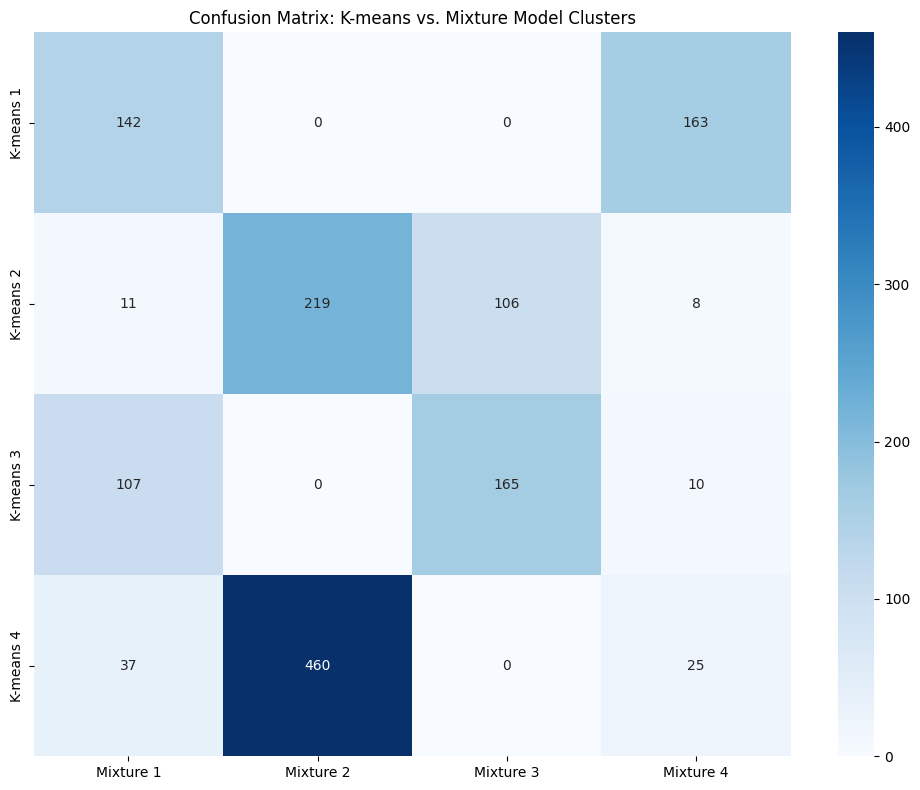


Best matching between clusters:
K-means cluster 1 best matches with Mixture model cluster 4
K-means cluster 2 best matches with Mixture model cluster 2
K-means cluster 3 best matches with Mixture model cluster 3
K-means cluster 4 best matches with Mixture model cluster 1


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix: K-means vs. Mixture Model Clusters")
plt.tight_layout()
plt.show()

# Might need to permute the cluster labels to better match between methods
# Find best matching:
def find_best_matching(conf_matrix):
    n_clusters = conf_matrix.shape[0]
    best_matching = {}
    remaining_cols = list(range(n_clusters))

    for i in range(n_clusters):
        best_col = remaining_cols[np.argmax(conf_matrix[i, remaining_cols])]
        best_matching[i] = best_col
        remaining_cols.remove(best_col)

    return best_matching

best_matching = find_best_matching(conf_matrix)
print("\nBest matching between clusters:")
for km_cluster, mix_cluster in best_matching.items():
    print(f"K-means cluster {km_cluster+1} best matches with Mixture model cluster {mix_cluster+1}")


Reversed frequency table of 'Like' variable:
Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


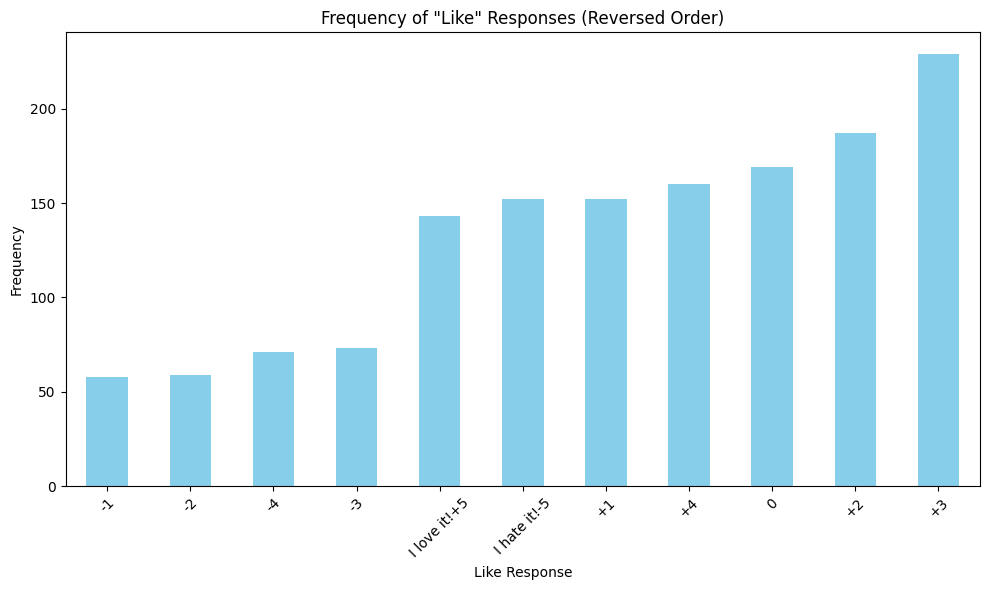

In [ ]:
#Frequency table for the 'Like' column
like_table = mcd['Like'].value_counts()

# Reverse the order (equivalent to R's rev() function)
like_table_reversed = like_table.iloc[::-1]

# Display the reversed frequency table
print("Reversed frequency table of 'Like' variable:")
print(like_table_reversed)



plt.figure(figsize=(10, 6))
like_table_reversed.plot(kind='bar', color='skyblue')
plt.title('Frequency of "Like" Responses (Reversed Order)')
plt.xlabel('Like Response')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(1234)


X_cluster_numerical = MD_x

# Fit Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
clusters = gmm.fit_predict(X_cluster_numerical) # Use the numerical data

mcd['cluster'] = clusters

print(mcd['cluster'].value_counts().sort_index())

cluster
0    985
1    468
Name: count, dtype: int64


In [ ]:
print("Summary of 2-component Gaussian Mixture Model:")
print("---------------------------------------------")

# same as Call: (Describes how the model was run)
print(f"Call: GaussianMixture(n_components={gmm.n_components}, n_init={gmm.n_init}, random_state={gmm.random_state}, covariance_type='full')") # Explicitly mention covariance_type

# same as Cluster sizes:
print("\nCluster sizes:")
print(mcd['cluster'].value_counts().sort_index())

# same as convergence information:
print(f"\nConvergence after {gmm.n_iter_} iterations")
print(f"Model converged: {gmm.converged_}")

# Log-likelihood
log_likelihood = gmm.score(MD_x) * MD_x.shape[0]  #average log-likelihood per sample
print(f"\nLog-likelihood: {log_likelihood:.3f}")

# Information Criteria (AIC, BIC)
n_samples, n_features = MD_x.shape
k = gmm.n_components
p = n_features

# number of parameters for full covariance
n_params = (k - 1) + k * p + k * (p * (p + 1) // 2)

aic = -2 * log_likelihood + 2 * n_params
bic = -2 * log_likelihood + n_params * np.log(n_samples)
print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")


print("\nComponent Means (Probability of 'Yes' for each feature in each cluster):")

print(np.round(gmm.means_, 3))

print("\nComponent Weights (Proportion of each cluster):")
print(np.round(gmm.weights_, 3))

Summary of 2-component Gaussian Mixture Model:
---------------------------------------------
Call: GaussianMixture(n_components=2, n_init=10, random_state=1234, covariance_type='full')

Cluster sizes:
cluster
0    985
1    468
Name: count, dtype: int64

Convergence after 7 iterations
Model converged: True

Log-likelihood: 11147.821
AIC: -21985.64
BIC: -21167.03

Component Means (Probability of 'Yes' for each feature in each cluster):
[[0.682 1.    0.092 0.85  0.434 1.    0.666 0.777 0.278 0.243 0.   ]
 [0.28  0.714 0.096 0.904 0.722 0.69  0.457 0.365 0.526 0.107 0.754]]

Component Weights (Proportion of each cluster):
[0.678 0.322]


Generating plot of Component Means for 2-component GMM...


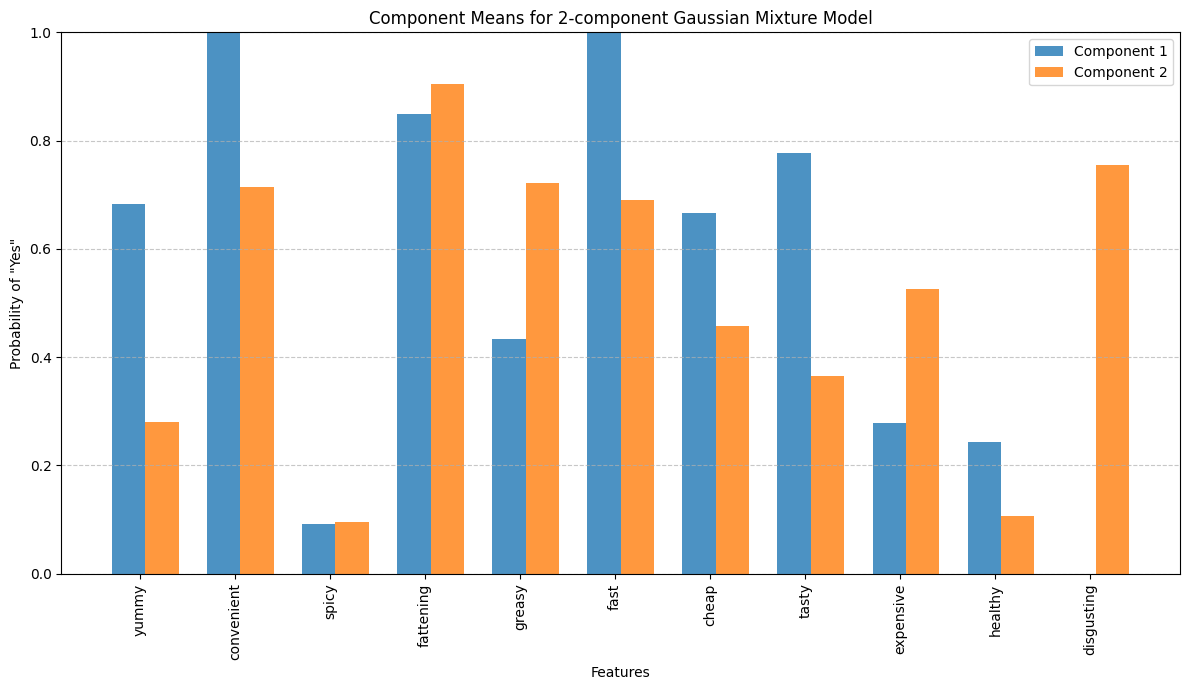

Plot generated.


In [ ]:
print("Generating plot of Component Means for 2-component GMM...")

n_components = gmm.n_components
n_features = gmm.means_.shape[1]

# for plotting
bar_width = 0.35
index = np.arange(n_features)

plt.figure(figsize=(12, 7))

# bars for each component
for i in range(n_components):
    plt.bar(index + i * bar_width, gmm.means_[i], bar_width, label=f'Component {i+1}', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Probability of "Yes"')
plt.title('Component Means for 2-component Gaussian Mixture Model')
plt.xticks(index + bar_width / (2*n_components-1) if n_components > 1 else index + bar_width / 2, column_names, rotation=90)
plt.ylim(0, 1) # Probabilities are between 0 and 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
print("Plot generated.")

In [ ]:
# Transpose the data matrix to cluster features
MD_x_transposed = MD_x.T

# euclidean distance for distance matrix between features
feature_distances = pdist(MD_x_transposed, metric='euclidean')

# hierarchical clustering
MD_vclust_linkage = linkage(feature_distances, method='complete')

dendro_info = dendrogram(MD_vclust_linkage, no_plot=True)
feature_order = dendro_info['leaves'] # indices of features in the order they appear in the dendrogram

Generating combined plot of PCA projection with K-means clusters and projection axes...


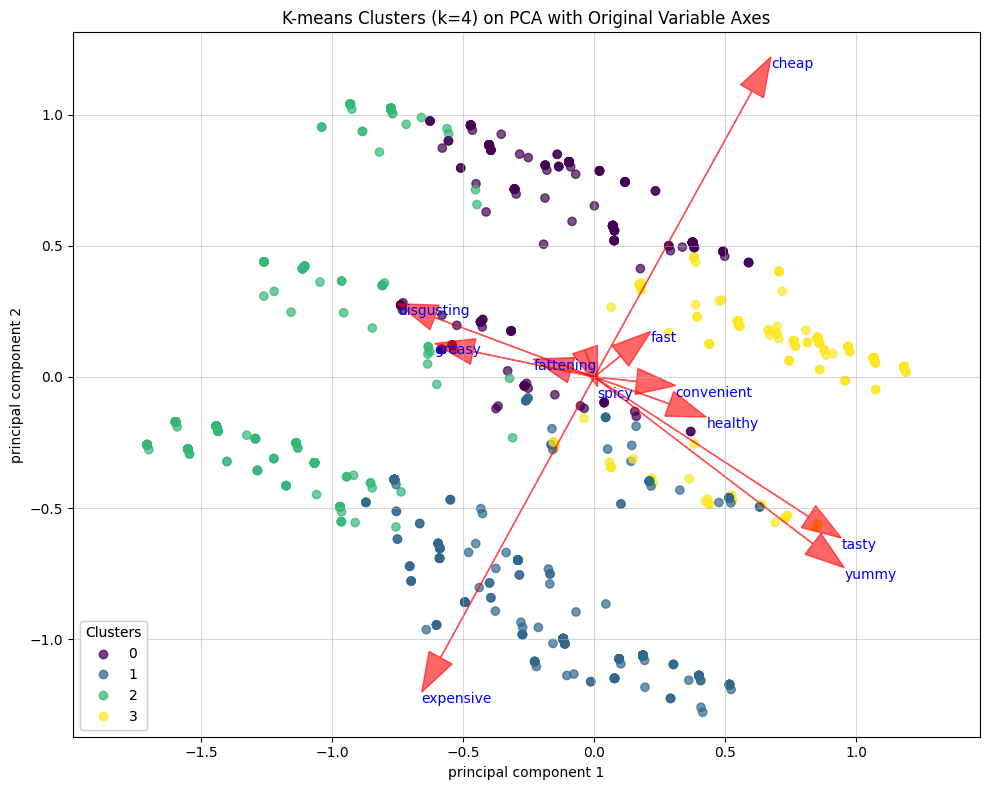

Combined PCA plot with K-means clusters and projection axes generated.


In [ ]:
print("Generating combined plot of PCA projection with K-means clusters and projection axes...")

plt.figure(figsize=(10, 8))

# 1. Scatter plot of data points on PC1 and PC2, colored by cluster (from previous step)
scatter = plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=kmeans_4.labels_, cmap='viridis', alpha=0.7)

# add labels and title for the scatter plot
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('K-means Clusters (k=4) on PCA with Original Variable Axes') # Updated title

# add a color bar to show the cluster mapping
legend1 = plt.legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
plt.gca().add_artist(legend1)

plt.grid(alpha=0.5)
plt.axis('equal') # Maintain aspect ratio

# 2. arrows and text
for i, feature_name in enumerate(column_names):
    # Get loadings for PC1 and PC2 for the current feature
    loading_pc1 = pca.components_[0, i]
    loading_pc2 = pca.components_[1, i]

    plt.arrow(0, 0,
              loading_pc1 * 2,
              loading_pc2 * 2,
              color='red', alpha=0.6, head_width=0.1, length_includes_head=True)

    plt.text(loading_pc1 * 2,
             loading_pc2 * 2,
             feature_name, color='Blue', ha='left', va='top')


# circle = plt.Circle((0, 0), 1, fill=False, color='magenta', linestyle='--')
# plt.gca().add_patch(circle)


plt.tight_layout()
plt.show()

print("Combined PCA plot with K-means clusters and projection axes generated.")

In [ ]:
# kmeans for each cluster count with multiple repetitions
for k in cluster_range:
    best_inertia = float('inf')
    best_model_k = None # temp var

    print(f"Processing {k} clusters (KMeans)...")

    # different initializations
    for rep in range(n_reps):
        kmeans = KMeans(n_clusters=k, random_state=np.random.randint(0, 10000), n_init=1)
        kmeans.fit(MD_x)

        # keep the model with the lowest inertia
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_model_k = kmeans # best_model_k is a KMeans object

    # store the best KMeans model for this k
    best_models[k] = best_model_k


print("Finished fitting KMeans models and populating best_models.")


kmeans_4 = best_models[4]
k4_labels = kmeans_4.labels_
print("k4_labels variable has been created from the KMeans model.")

Processing 2 clusters (KMeans)...
Processing 3 clusters (KMeans)...
Processing 4 clusters (KMeans)...
Processing 5 clusters (KMeans)...
Processing 6 clusters (KMeans)...
Processing 7 clusters (KMeans)...
Processing 8 clusters (KMeans)...
Finished fitting KMeans models and populating best_models.
k4_labels variable has been created from the KMeans model.


Contingency table of K-means Clusters (k=4) vs. Like variable:
Like   +1  +2   +3   +4  -1  -2  -3  -4   0  I hate it!-5  I love it!+5
row_0                                                                  
0      49  44   16    5  29  23  28  25  65            21             0
1      49  58   73   46  10   9  11   3  41             6            38
2       8   7    5    0  12  21  34  40  32           122             1
3      46  78  135  109   7   6   0   3  31             3           104

Normalized Contingency table (Proportions within each segment):
Like         +1        +2        +3        +4        -1        -2        -3  \
row_0                                                                         
0      0.160656  0.144262  0.052459  0.016393  0.095082  0.075410  0.091803   
1      0.142442  0.168605  0.212209  0.133721  0.029070  0.026163  0.031977   
2      0.028369  0.024823  0.017730  0.000000  0.042553  0.074468  0.120567   
3      0.088123  0.149425  0.258621  0.208812

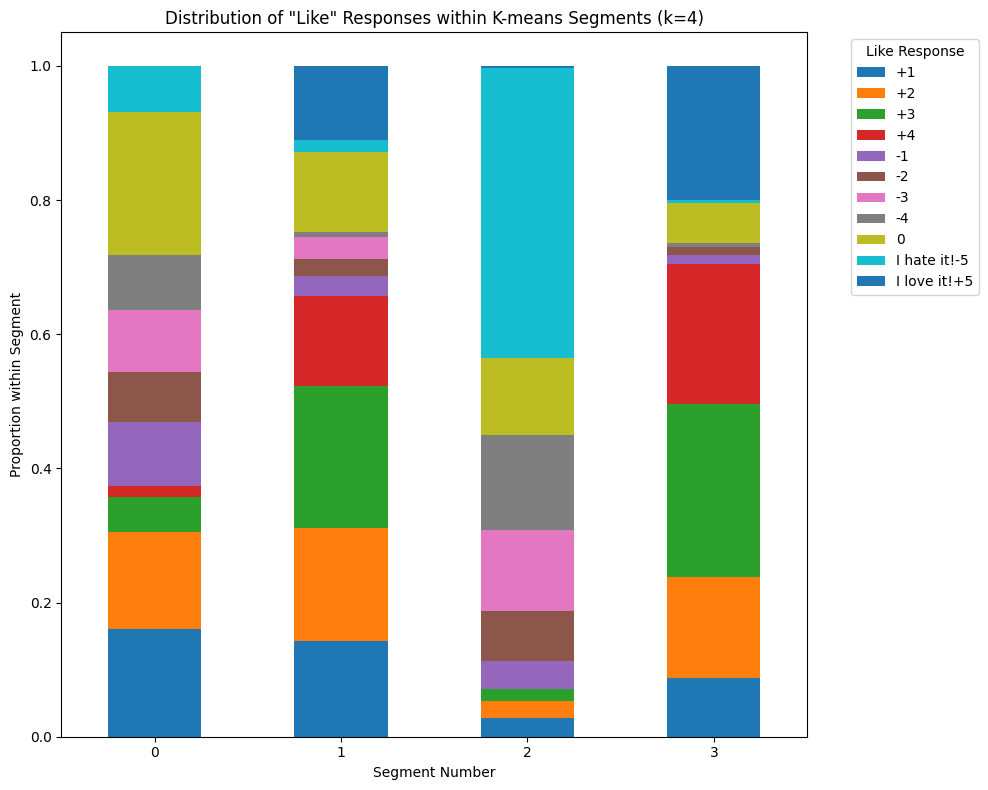


Stacked bar chart generated.


In [ ]:
# contingency table
contingency_table = pd.crosstab(k4_labels, mcd['Like'])

print("Contingency table of K-means Clusters (k=4) vs. Like variable:")
print(contingency_table)

# normalize by row -> proportions within each segment (like mosaic plot)
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("\nNormalized Contingency table (Proportions within each segment):")
print(contingency_table_normalized)


# Generate a stacked bar chart from the normalized table
plt.figure(figsize=(10, 8))

# Stacked bar chart
# index of the DataFrame -> x-axis (Segments) || each column -> section of the stacked bar (Like)
contingency_table_normalized.plot(kind='bar', stacked=True, ax=plt.gca())


plt.xlabel('Segment Number') # Corresponds to k4_labels
plt.ylabel('Proportion within Segment')
plt.title('Distribution of "Like" Responses within K-means Segments (k=4)')
plt.xticks(rotation=0)

#legend outside the plot
plt.legend(title='Like Response', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\nStacked bar chart generated.")

Contingency table of K-means Clusters (k=4) vs. Gender variable:
Gender  Female  Male
row_0               
0          174   131
1          164   180
2          135   147
3          315   207

Normalized Contingency table (Proportions within each segment):
Gender    Female      Male
row_0                     
0       0.570492  0.429508
1       0.476744  0.523256
2       0.478723  0.521277
3       0.603448  0.396552


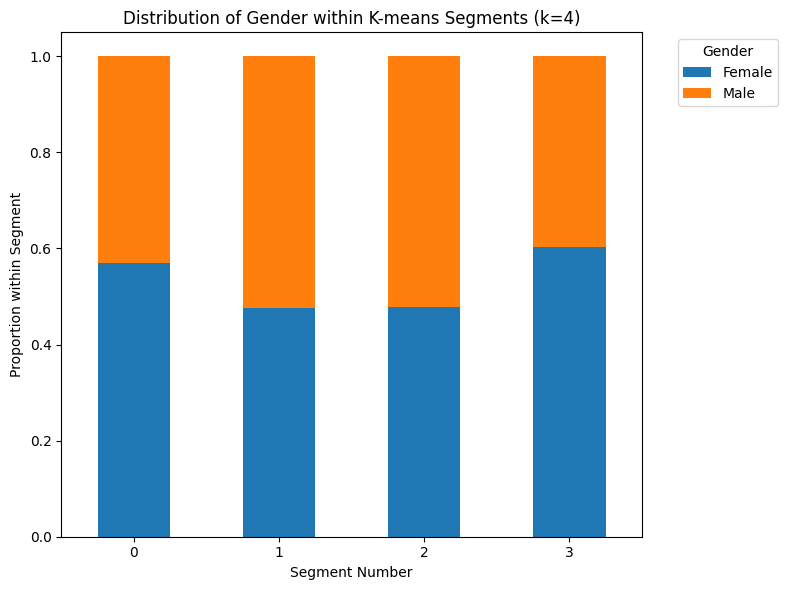


Stacked bar chart for Gender generated.


In [ ]:
# Contingency table of segments vs. Gender
contingency_table_gender = pd.crosstab(k4_labels, mcd['Gender'])

print("Contingency table of K-means Clusters (k=4) vs. Gender variable:")
print(contingency_table_gender)

# normalize by row to show proportions within each segment.
contingency_table_gender_normalized = contingency_table_gender.div(contingency_table_gender.sum(axis=1), axis=0)

print("\nNormalized Contingency table (Proportions within each segment):")
print(contingency_table_gender_normalized)


# Stacked bar chart
plt.figure(figsize=(8, 6))

contingency_table_gender_normalized.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xlabel('Segment Number') # index -> segment number
plt.ylabel('Proportion within Segment')
plt.title('Distribution of Gender within K-means Segments (k=4)')
plt.xticks(rotation=0)

#legend outside plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nStacked bar chart for Gender generated.")

Generating boxplot of Age by K-means Cluster...


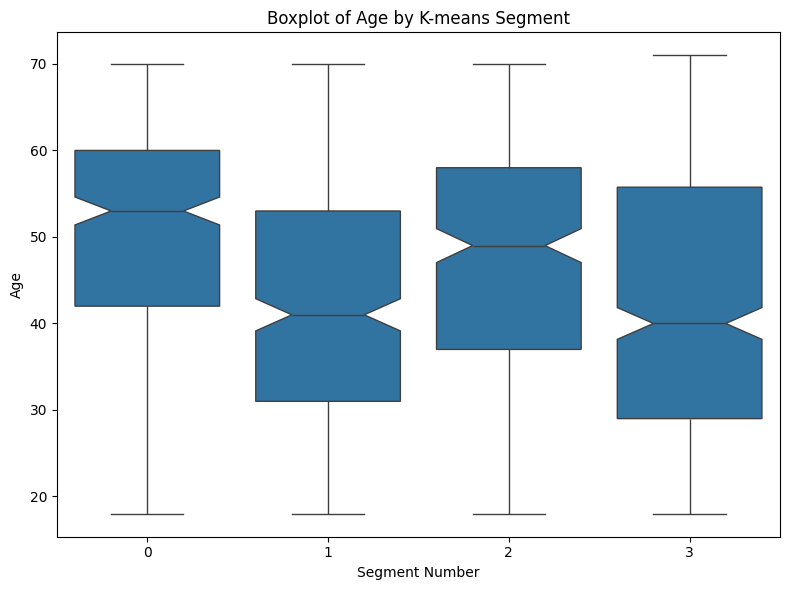


Boxplot generated.


In [ ]:
mcd['k4_cluster'] = k4_labels

print("Generating boxplot of Age by K-means Cluster...")

plt.figure(figsize=(8, 6))

# Boxplot

# x -> column for grouping variable (cluster labels)
# y -> column for the numerical variable (Age)
# data -> The DataFrame containing the data
# notch=True: adds the notches to the boxplots for median comparison
sns.boxplot(x='k4_cluster', y='Age', data=mcd, notch=True)

plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Boxplot of Age by K-means Segment')

plt.tight_layout()
plt.show()

print("\nBoxplot generated.")


Fitting a Decision Tree Classifier to predict membership in Cluster 3...
Decision Tree Classifier fitted.

Plotting the Decision Tree...


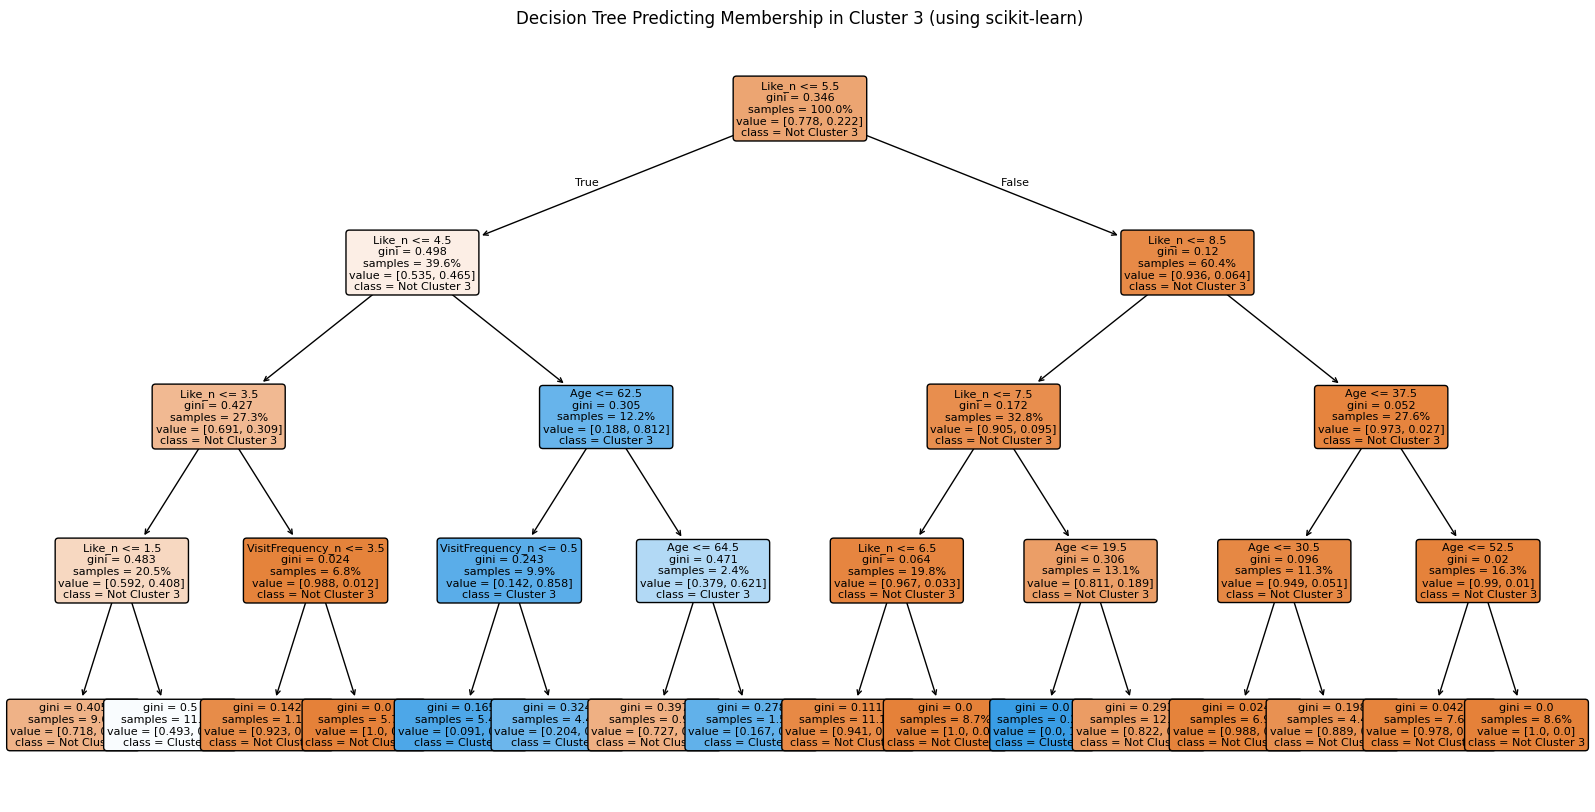


Decision Tree plot generated.


In [ ]:
# 1. Create the binary response variable: In K-means Cluster 3 (index 2)?
mcd['is_cluster_3'] = (k4_labels == 2).astype(int)

# 2. Prepare Predictor Variables:

# create numerical 'Like_n' by mapping ordered categories to integers
like_mapping_ordered = {label: i for i, label in enumerate(like_table_reversed.index)}
mcd['Like_n'] = mcd['Like'].map(like_mapping_ordered)

# numerically encode 'Gender'
if mcd['Gender'].dtype == 'object':
    le_gender = LabelEncoder()
    mcd['Gender_n'] = le_gender.fit_transform(mcd['Gender'])

else:
    mcd['Gender_n'] = mcd['Gender'] # Use as is if already numerical



visit_freq_mapping_ordered = {
    'Never': 0,
    'Once a year': 1,
    'Every few months': 2,
    'Every three months': 3,
    'Once a month': 4,
    'Every two weeks': 5,
    'Weekly': 6,
    'More than once a week': 7,
    'Daily': 8

}
mcd['VisitFrequency_n'] = mcd['VisitFrequency'].map(visit_freq_mapping_ordered)


predictor_cols = ['Like_n', 'Age', 'VisitFrequency_n', 'Gender_n']


# drop rows with missing values and NaNs
data_for_tree = mcd[predictor_cols + ['is_cluster_3']].dropna()

X_tree = data_for_tree[predictor_cols]
y_tree = data_for_tree['is_cluster_3']

# 3. Fit the Decision Tree Classifier
print("\nFitting a Decision Tree Classifier to predict membership in Cluster 3...")


tree_model = DecisionTreeClassifier(random_state=1234, max_depth=4)
tree_model.fit(X_tree, y_tree)

print("Decision Tree Classifier fitted.")

# 4. Plot the fitted tree
print("\nPlotting the Decision Tree...")

plt.figure(figsize=(20, 10))

plot_tree(
    tree_model,
    feature_names=predictor_cols,
    class_names=['Not Cluster 3', 'Cluster 3'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=8
)
plt.title('Decision Tree Predicting Membership in Cluster 3 (using scikit-learn)')
plt.show()

print("\nDecision Tree plot generated.")

mcd = mcd.drop(['is_cluster_3', 'Like_n', 'Gender_n', 'VisitFrequency_n'], axis=1, errors='ignore')

In [ ]:
# using the mapping from the previous step:
if 'VisitFrequency_n' not in mcd.columns:
     print("Creating numerical 'VisitFrequency_n' column...")
     visit_freq_mapping_ordered = {
        'Never': 0, 'Once a year': 1, 'Every few months': 2, 'Every three months': 3,
        'Once a month': 4, 'Every two weeks': 5, 'Weekly': 6, 'More than once a week': 7, 'Daily': 8
     }
     mcd['VisitFrequency_n'] = mcd['VisitFrequency'].map(visit_freq_mapping_ordered)



# group DataFrame rows based on the values in k4_labels.
visit_means = mcd.groupby(k4_labels)['VisitFrequency_n'].mean()


print("Mean Visit Frequency by K-means Cluster:")
print(visit_means)

Creating numerical 'VisitFrequency_n' column...
Mean Visit Frequency by K-means Cluster:
0    2.260714
1    3.387900
2    1.464945
3    3.704663
Name: VisitFrequency_n, dtype: float64


In [ ]:
i# using the mapping based on like_table_reversed.index:
if 'Like_n' not in mcd.columns:
    like_mapping_ordered = {label: i for i, label in enumerate(like_table_reversed.index)}
    mcd['Like_n'] = mcd['Like'].map(like_mapping_ordered)

like_means = mcd.groupby(k4_labels)['Like_n'].mean()

# The output index will be the cluster labels (0, 1, 2, 3)
print("Mean numerical 'Like' by K-means Cluster (0-11 scale):")
print(like_means)



Mean numerical 'Like' by K-means Cluster (0-11 scale):
0    5.465574
1    7.052326
2    4.375887
3    7.245211
Name: Like_n, dtype: float64


In [ ]:
female_proportions = mcd.groupby(k4_labels)['Gender'].apply(lambda x: (x == 'Female').mean())

print("Proportion of Females by K-means Cluster:")
print(female_proportions)

Proportion of Females by K-means Cluster:
0    0.570492
1    0.476744
2    0.478723
3    0.603448
Name: Gender, dtype: float64



Generating scatter plot of cluster means (adapted, dynamic limits)...


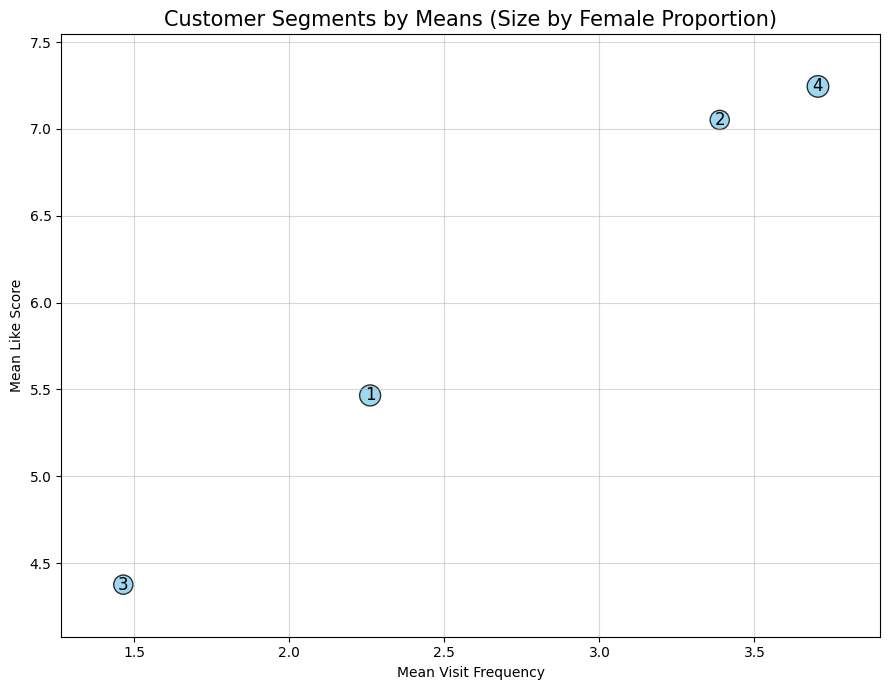


Scatter plot of cluster means (adapted, dynamic limits) generated.


In [ ]:
print("\nGenerating scatter plot of cluster means (adapted, dynamic limits)...")

plt.figure(figsize=(9, 7))

plt.scatter(
    visit_means, # calculated mean Visit Frequency for x
    like_means, # calculated mean Like Score for y
    s=400 * female_proportions, # Size scaled by female proportion per cluster
    color='skyblue',
    edgecolor='black',
    alpha=0.8
)


x_padding = 0.2
y_padding = 0.3
plt.xlim(visit_means.min() - x_padding, visit_means.max() + x_padding) # X limits based on visit_means range
plt.ylim(like_means.min() - y_padding, like_means.max() + y_padding) # Y limits based on like_means range



# iterate through cluster labels (0, 1, 2, 3) --> index of visit_means
for cluster_label in visit_means.index:
    # coordinates for the current cluster's mean
    x_coord = visit_means[cluster_label]
    y_coord = like_means[cluster_label]
    # text label is the cluster number + 1
    text_label = str(cluster_label + 1)
    plt.text(x_coord, y_coord, text_label, fontsize=12, ha='center', va='center')


plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Score')
plt.title('Customer Segments by Means (Size by Female Proportion)', fontsize=15)
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

print("\nScatter plot of cluster means (adapted, dynamic limits) generated.")